<a href="https://colab.research.google.com/github/Aragnzlz/SIMULACION-II/blob/main/COLA_CON_UN_SERVIDOR%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

## COLA CON UN SERVIDOR

El modelo obedece al siguiente sistema

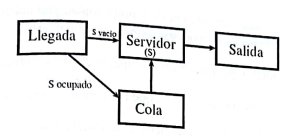

Por lo habitual la gestión de una cola sigue el sistema FIFO, es decir, el primero que entra es el primero que sale.
Para este programa se manejan los siguiente supuestos:


1.   El timepo de atención en el servidor, Y, es una variable aleatoria cuya simulacion es factible
2.   Hay una hora de cierre, t, después de la cual no se permiten llegadas pero si se atienden a los elementos que estan en el sistema
3. No hay limitaciones de capacidad en el sistema. Si las hubiera, no habría más que distingior entre llegadas efectivas, los que consiguen entrar y llegadas no efectivas, si no es así. Estas pultimas pueden tratarse de forma qe se pierden o que, con alguna probabilidad, se prduce el reintento.


Las variables se consideran las siguientes:
* Variable de tiempo
* NLL: Npumero de llegadas hasta el instante t
* NS = número de salidas hasta el instante t
* n : número de clientes en el sistema en el instante t



In [6]:
def lam(t):
  if 0 <= t <= 3:
    return 5+5*t
  elif 3 <= t <= 5:
    return 20
  elif 5 <= t <= 9:
    return 20-2*(t-5)
  else:
    return 0

In [7]:
def T_llegada(te,k,l): #Tiempo de llegada
  t = 0
  I = 0
  j = 0
  M = 0
  S = []
  while True:
     U1 = np.random.uniform(0,1)
     X = -(1/l[j])*np.log(U1)
     if (X+t <= te[j] and j <= k):
      t = X + t
     U2 = np.random.uniform(0,1)
     if (U2 <= lam(t)/l[j]):
      I = I+1
      S.append(t)
     if U2 > lam(t)/l[j]:
      M = M+1
     if (X+t > te[j] and j < k):
      X = l[j]*(X - te[j]+t)/l[j+1]
      t = te[j]
      j = j+1
     if (X + t > te[j] and j == k):
      break
  print(j)
  print("Tasa de aceptación")
  print(len(S)/M+I)
  print("S")
  return S

In [8]:
te = [1,2,6,7,8,9]
l = [10,15,20,18,16,14]
k = len(te)-1
cierre = 9

In [9]:
LL = T_llegada(te,k,l)
LL.append(math.inf)

5
Tasa de aceptación
134.1818181818182
S


In [10]:
#Generación del tiempo de servicio
def tserv():
  t = (-1/2)*np.log(np.random.uniform(0,1))
  return t


In [11]:
# Evolución del sitema
def unserv(LL,cierre):
    t = 0
    NLL = 0
    NS = 0
    n = 0
    Y = []
    sal = []
    c = []
    Tp = 0
    #Lista de sucesos
    tLL = LL[0]
    ts = math.inf
    tm = []
    i = 0
    j = 0

    #CASO 1
    while True:

        if (tLL <= ts) and (tLL <= cierre):
            t = tLL
            NLL = NLL + 1
            i += 1
            tLL = LL[i]
            n += 1
            c.append(n)
            if (n == 1):
                Y.append(tserv())
                ts = t + Y[j]
                #cliente
                j += 1

        #CASO 2

        if (ts <= tLL) and (tLL <= cierre):
            t = ts
            NS += 1
            n -= 1
            c.append(n)
            sal.append(t)
            tm.append(sal[NS-1]-LL[NS-1])
            if (n==0):
                ts = math.inf
            if (n > 0):
                Y.append(tserv())
                ts = t + Y[j]
                j += 1

        #CASO 3

        if (min(tLL,ts) > cierre):
            if(n > 0):
                t = ts
                NS += 1
                n -= 1
                c.append(n)
                sal.append(t)
                tm.append(sal[NS-1]-LL[NS-1])
                if (n>0):
                    Y.append(tserv())
                    ts = t + Y[j]
                    j += 1
        #CASO 4
        if (n == 0): #Si no quedan clientes
            Tp = max(t-cierre, 0)
            break
    if (ts == math.inf):
        ts = t
    resultados = [
        ('Tiempos en el sistema', tm),
        ('Clientes en el sistema', c),
        ('Tiempo medio del cliente en el sistema', np.nanmean(tm)),
        ('Número medio del cliente en el sistema', np.mean(c)),
        ('Tiempo después de cierre', Tp),
        ('Tiempos de atención', Y),
        ('Última salida', ts)
    ]
    return resultados

In [12]:
RES = unserv(LL,9)
print(RES)

[('Tiempos en el sistema', [0.5549463737250623, 1.6418778914692922, 1.8150548024696274, 2.355494299091924, 2.402193497903348, 2.517002822138603, 2.662927771324136, 3.1407678004970565, 3.547604016429225, 4.279627567566189, 4.284902872309308, 5.556744828043651, 6.372015039606206, 7.3498669282694715, 7.3492213683498875, 7.448818309113412, 7.63911671289826, 7.838064717798707, 8.544815230532336, 10.002473605052288, 10.440629415627905, 10.453997367952416, 11.384790367792288, 11.438563069510934, 11.371864587862373, 12.750104590456461, 13.409892849799775, 15.20879876980718, 15.25802313637946, 15.337021038053267, 16.6627582814614, 17.09276500440228, 18.270208489834555, 18.437487162467427, 18.411641726481754, 18.806504479232462, 19.08234757280375, 19.318376970084167, 19.87281292481289, 19.99384324862901, 20.066275796886657, 20.072690421525902, 20.03523836648631, 20.519104370062895, 20.73621977089534, 21.270194775440817, 21.19107212602171, 22.176432979147837, 23.806782107927603, 23.94994324933014

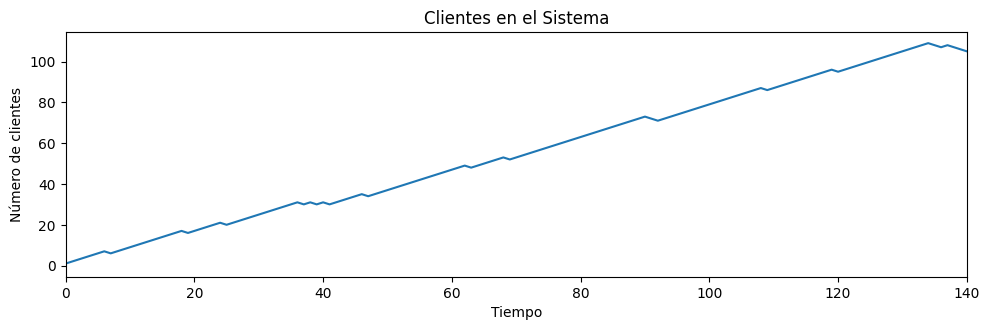

In [13]:

import random
import numpy as np
import math
import matplotlib.pyplot as plt

tiempos_sistema = RES[1][1]
clientes_sistema = RES[1][1]

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 2)
plt.plot(clientes_sistema)
plt.title('Clientes en el Sistema')
plt.xlabel('Tiempo')
plt.ylabel('Número de clientes')
plt.xlim(0,140)


plt.tight_layout()
plt.show()